[-1.36363636e+10  0.00000000e+00] [1.36363636e+11 0.00000000e+00]
[   0.         2844.30318462] [     0.         -28443.03184624]


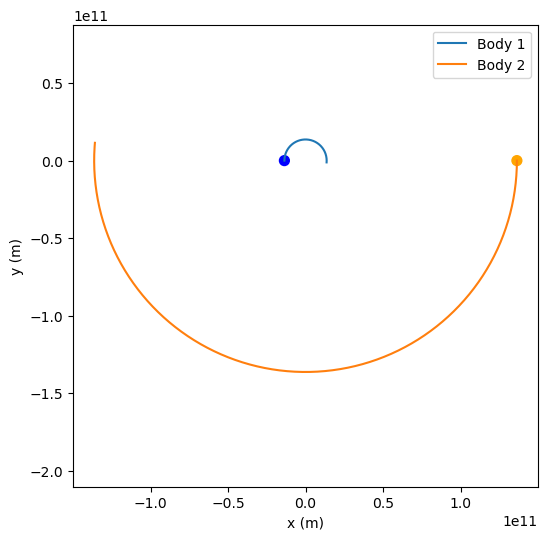

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2

# Masses
m1 = 2.0e30  # kg
m2 = 2e29  # kg

# Initial separation
R = 1.5e11  # meters (~1 AU)

# Center of mass at origin
r1 = np.array([-m2/(m1+m2)*R, 0.0])
r2 = np.array([m1/(m1+m2)*R, 0.0])

print(r1,r2)

# Circular orbit velocities (perpendicular to r)
v_total = np.sqrt(G * (m1 + m2) / R)
v1 = np.array([0.0,  v_total * m2/(m1+m2)])
v2 = np.array([0.0, -v_total * m1/(m1+m2)])

print(v1,v2)

# State vector: [r1, r2, v1, v2]
state = np.concatenate([r1, r2, v1, v2])

# Time parameters
dt = 60*60*24  # 1 day in seconds
t_max = 60*60*24*180  # 1 year
n_steps = int(t_max / dt)

# Derivatives function
def derivatives(state):
    r1 = state[0:2]
    r2 = state[2:4]
    v1 = state[4:6]
    v2 = state[6:8]
    
    r12 = r2 - r1
    dist = np.linalg.norm(r12)
    
    a1 = G * m2 * r12 / dist**3
    a2 = -G * m1 * r12 / dist**3
    
    return np.concatenate([v1, v2, a1, a2])

# RK4 step
def rk4_step(state, dt):
    k1 = derivatives(state)
    k2 = derivatives(state + 0.5*dt*k1)
    k3 = derivatives(state + 0.5*dt*k2)
    k4 = derivatives(state + dt*k3)
    return state + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# Arrays to store trajectories
traj1 = np.zeros((n_steps, 2))
traj2 = np.zeros((n_steps, 2))

# Integration loop
for i in range(n_steps):
    traj1[i] = state[0:2]
    traj2[i] = state[2:4]
    state = rk4_step(state, dt)

# Plot trajectories
plt.figure(figsize=(6,6))
plt.plot(traj1[:,0], traj1[:,1], label='Body 1')
plt.plot(traj2[:,0], traj2[:,1], label='Body 2')
plt.scatter([traj1[0,0], traj2[0,0]], [traj1[0,1], traj2[0,1]], c=['blue','orange'], s=50)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal')
plt.legend()
plt.show()
